# Задание №5. Аттрактор Лоренца.

### Импорт модулей

In [1]:
from typing import Callable, Tuple
import matplotlib.pyplot as plt

%matplotlib inline

### Метод Рунге-Кутта

In [2]:
def runge_kutta(fs: Tuple[Callable], n: int, h: float, t: float, x: float, y: float, z: float) -> Tuple[float, float, float, float]:
    """ Численный метод решения систем обыкновенных дифференциальных уравнений методом Рунге-Кутта
    
        :param fs: кортеж из первого и второго уравнений
        :type fs: Tuple[Callable]
        :param n: количество итераций (дней)
        :type n: int
        :param h: шаг
        :type h: float
        :param t: начальная точка `t`
        :type t: float
        :param x: начальная точка `x`
        :type x: float
        :param y: начальная точка `y`
        :type y: float
        :param z: начальная точка `z`
        :type z: float
        
        :return: решение ДУ
        :rtype: Tuple[float, float, float, float]
    """
    def k(k1, k2, k3, k4):
            return (k1 + 2*k2 + 2*k3 + k4)/6
    for _ in range(n):
        k11, k21, k31 = map(lambda f: h * f(t, x, y, z), fs)
        k12, k22, k32 = map(lambda f: h * f(t + h/2, x + k11/2, y + k21/2, z + k31/2), fs)
        k13, k23, k33 = map(lambda f: h * f(t + h/2, x + k12/2, y + k22/2, z + k32/2), fs)
        k14, k24, k34 = map(lambda f: h * f(t + h,   x + k13,   y + k23,   z + k33/2), fs)
        k1, k2, k3 = k(k11, k12, k13, k14), k(k21, k22, k23, k24), k(k31, k32, k33, k34)
        t, x, y, z = t + h, x + k1, y + k2, z + k3
    return t, x, y, z

In [3]:
def f1(t, x, y, z, *, a=10):
    return -a*x+a*y

In [4]:
def f2(t, x, y, z, *, r=30):
    return r*x-y-x*z

In [5]:
def f3(t, x, y, z, *, b=8/3):
    return -b*z+x*y

In [6]:
runge_kutta((f1, f2, f3), 501, 0.01, 0, 1, 1, 1)

(5.009999999999938, -9.44849588377967, -9.838051492355438, 29.353242470853118)

### Визуализация

In [7]:
x_points, y_points, z_points = [], [], []
for k in range(5000):
    res = runge_kutta((f1, f2, f3), k, 0.01, 0, 1, 1, 1)
    x_points.append(res[1])
    y_points.append(res[2])
    z_points.append(res[3])

#### Проекция на плоскость Oxy

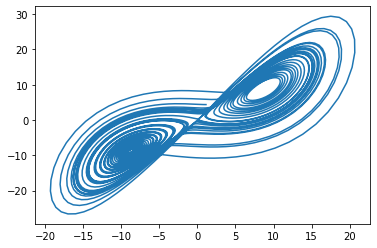

In [8]:
plt.plot(x_points, y_points)

#### Проекция на плоскость Oxz

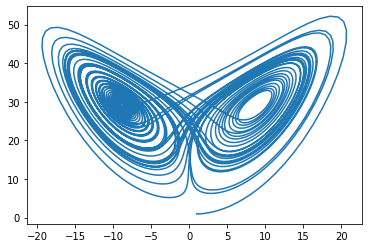

In [9]:
plt.plot(x_points, z_points)

#### Проекция на плоскость Oyz

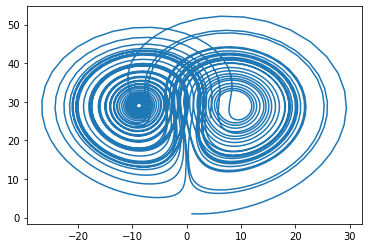

In [10]:
plt.plot(y_points, z_points)